# PCA : a warm up

Lets start with a small dataset to get intuition on how PCA works.

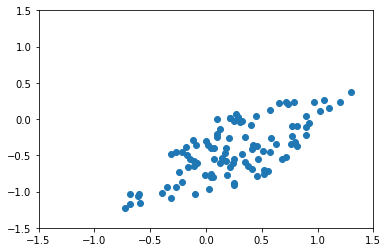

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Generate and plot a 2d dataset with some positive correlation using stats & linear algebra tricks!
rng = np.random.RandomState(5)
X = np.dot(rng.rand(100, 2), rng.randn(2, 2))
plt.scatter(X[:, 0], X[:, 1])

plt.xlim(xmin=-1.5, xmax=1.5); plt.ylim(ymin=-1.5, ymax=1.5)
plt.show()

Can you see the positive correlation between the X0 and X1?

In PCA, this relationship is quantified by finding a list of the principal axes in the data. Lets do this using Sklearn.

👉 First, import the PCA and call PCA with `n_components=2`. Fit the PCA to the `X` data.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

There is two objects we're interested in that `pca` object : 

- `pca.components_`: it's a set of eigenvectors which point to the directions where the variance is maximally explained. In other words, the directions of maximum variance.

- `pca.explained_variance_`:  $\frac{Var(PC)}{Var(X)}$, given by the corresponding L2 norm of these eigenvectors

Let's visualize those two Pincipal Components. 
Execute the two following cells, and make sur to understand how they work

In [0]:
def draw_vector(v0, v1, ax=None):
    '''
    Plot 2 vectors in the same ax
    '''
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', color='red', linewidth=2)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-1.5, 1.5)

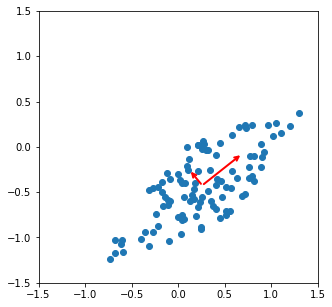

In [0]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Visualize the square root of their lenghts, in order to compare same "units" (sqrt(Var)=std)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.xlim(xmin=-1.5, xmax=1.5); plt.ylim(ymin=-1.5, ymax=1.5)

The length of the vector is a measure of the standard deviation of the data when projected onto that axis!

We can then use those directions to "explain" most of our observations behaviour - most of the distinction between observations happens along thoses axis. 

### Now what happens when we use those components?

We can use those components (`pca.components_`, the red arrows on the plot) to transform every sample of our dataset and see it in a new space where its variance is more clear and hence more easy to visualize.

To do that, first transform the dataset into the new space by using the function `transform` of your `pca` object, then you can plot this transformation.

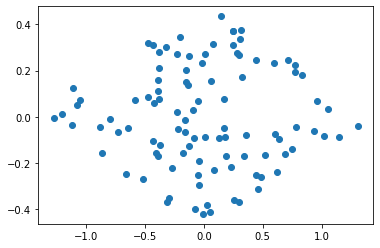

In [0]:
X_transformed = pca.transform(X)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [0]:
pca.transform(pca.components_)

array([[ 0.27032791, -0.48568559],
       [ 1.04516155,  0.6973752 ]])

We have stretched the whole dataset into it's nicer form, where we can now study the behviour __between__ the observations. It's not crushed anymore into a line that was too packed.

In [0]:
pca.components_

array([[ 0.77592318,  0.6308274 ],
       [-0.6308274 ,  0.77592318]])